In [1]:
import pandas as pd
import matplotlib.pyplot as plt

BASE_DIR = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative"
RUN_NAME = "cpg_enrichment_1_rep_in_cpg"

# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide DataFrames
pd.set_option('display.max_colwidth', None) # Don't truncate column contents


In [2]:
# Load the CpG enrichment results
cpg_enrichment_df = pd.read_csv(f"{BASE_DIR}/results/no_dedup/cpg_enrichment/NSC/broad/{RUN_NAME}/cpg_enrichment_parallel.csv")

In [3]:
# Display first few rows and basic info
print("DataFrame shape:", cpg_enrichment_df.shape)
print("\nFirst few rows:")
display(cpg_enrichment_df.head())
print("\nColumn names:")
print(cpg_enrichment_df.columns.tolist())

DataFrame shape: (14895, 31)

First few rows:


,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
0,chr1,3531624,3531843,219,611,CpG:,0.000000,3.272987,0.000000,1.0,endo_only,False,0,2,3,3,"0.0,0.0,0.0","0.0,7.742945475121067,2.076016413022394",0,0,NaN,5.10095,3531624,3531843,219,0.000000,3.272395,0.000000,0.999819,0,1
1,chr1,3670619,3671074,455,613,CpG:,29.962999,0.000000,inf,1.0,exo_only,False,3,0,3,3,"47.333859716142925,42.31702634371244,0.23810998528868288","0.0,0.0,0.0",0,0,6.06037,NaN,3670619,3671074,455,21.118221,0.000000,0.704810,0.000000,1,0
2,chr1,3671654,3672156,502,613,CpG:,13.596750,18.921372,0.718592,1.0,both,False,3,3,3,3,"3.061797170525053,5.682240710315476,32.046211683417695","35.88782899408226,18.74866663412269,2.1276208831969488",1,0,5.54931;6.06037,NaN,3671654,3672156,502,13.089529,13.783088,0.962695,0.728440,2,0
3,chr1,4491701,4493673,1972,619,CpG:,7.108247,7.530761,0.943895,1.0,both,False,2,2,3,3,"12.19944750513073,0.0,9.125292064210223","0.0,19.079104030833523,3.513177480949108",1,0,6.0982;5.8282,4.1282,4491701,4493673,1972,5.180604,8.290910,0.728816,1.100939,2,1
4,chr1,4571641,4572075,434,619,CpG:,29.865143,0.137681,216.916069,0.5,both,False,3,1,3,3,"16.923790716355846,19.305170516264603,53.36646880312449","0.4130419223539291,0.0,0.0",1,0,4.35039;6.82732;3.40697,NaN,4571641,4572075,434,16.646360,0.194710,0.557384,1.414214,3,0



Column names:
['chr', 'start', 'end', 'cpg_length', 'cpg_name', 'cpg_score', 'exo_signal', 'endo_signal', 'enrichment', 'pvalue', 'binding_type', 'significant', 'exo_replicates_with_signal', 'endo_replicates_with_signal', 'total_exo_replicates', 'total_endo_replicates', 'exo_replicate_signals', 'endo_replicate_signals', 'n_exo_peaks', 'n_endo_peaks', 'exo_peak_scores_by_rep', 'endo_peak_scores_by_rep', 'analysis_start', 'analysis_end', 'analysis_length', 'exo_signal_std', 'endo_signal_std', 'exo_signal_cv', 'endo_signal_cv', 'exo_replicates_with_peaks', 'endo_replicates_with_peaks']


In [4]:
# Sort the DataFrame by enrichment value in descending order
cpg_enrichment_df_sorted = cpg_enrichment_df.sort_values(by='enrichment', ascending=False)

# Display first few rows of sorted DataFrame
print("Top enriched CpG islands:")
display(cpg_enrichment_df_sorted.head())


Top enriched CpG islands:


,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
2418,chr11,98327044,98328778,1734,1335,CpG:,6.854713,0.0,inf,1.0,exo_only,False,3,0,3,3,"7.990108608787035,3.232515680473706,9.34151445980578","0.0,0.0,0.0",1,0,3.73655;3.1542,NaN,98327044,98328778,1734,2.620027,0.0,0.382223,0.0,2,0
14851,chrX,155622659,155623834,1175,1772,CpG:,1.589033,0.0,inf,1.0,exo_only,False,3,0,3,3,"0.22503600780000077,0.3996132708610372,4.142450824494057","0.0,0.0,0.0",1,0,7.39974,5.09069,155622659,155623834,1175,1.806945,0.0,1.137135,0.0,1,1
8106,chr2,153492290,153492775,485,1756,CpG:,10.478198,0.0,inf,1.0,exo_only,False,2,0,3,3,"4.750488743339617,26.684104919433594,0.0","0.0,0.0,0.0",1,0,5.97111;7.01922,NaN,153492290,153492775,485,11.622259,0.0,1.109185,0.0,2,0
48,chr1,17091517,17091971,454,715,CpG:,20.137771,0.0,inf,1.0,exo_only,False,2,0,3,3,"34.59418138008286,0.0,25.819131307139795","0.0,0.0,0.0",1,0,5.67863;7.84621,NaN,17091517,17091971,454,14.683273,0.0,0.729141,0.0,2,0
51,chr1,19104571,19104923,352,730,CpG:,3.841673,0.0,inf,1.0,exo_only,False,2,0,3,3,"11.307318889281966,0.0,0.21770102937113156","0.0,0.0,0.0",0,0,4.85382,NaN,19104571,19104923,352,5.279757,0.0,1.374338,0.0,1,0


In [5]:
# Split data based on binding type
exo_only_df = cpg_enrichment_df[cpg_enrichment_df['binding_type'] == 'exo_only']
endo_only_df = cpg_enrichment_df[cpg_enrichment_df['binding_type'] == 'endo_only'] 
both_df = cpg_enrichment_df[cpg_enrichment_df['binding_type'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df)}")
print(f"Number of CpG islands bound by both: {len(both_df)}")


Number of CpG islands bound by exo only: 447
Number of CpG islands bound by endo only: 265
Number of CpG islands bound by both: 14183


In [6]:
print("both_df['enrichment']")
print(both_df['enrichment'])

both_df['enrichment']
2          0.718592
3          0.943895
4        216.916069
5          1.243440
6          1.028220
            ...    
14890      0.010999
14891      1.471649
14892      0.653168
14893      0.155677
14894      0.808144
Name: enrichment, Length: 14183, dtype: float64


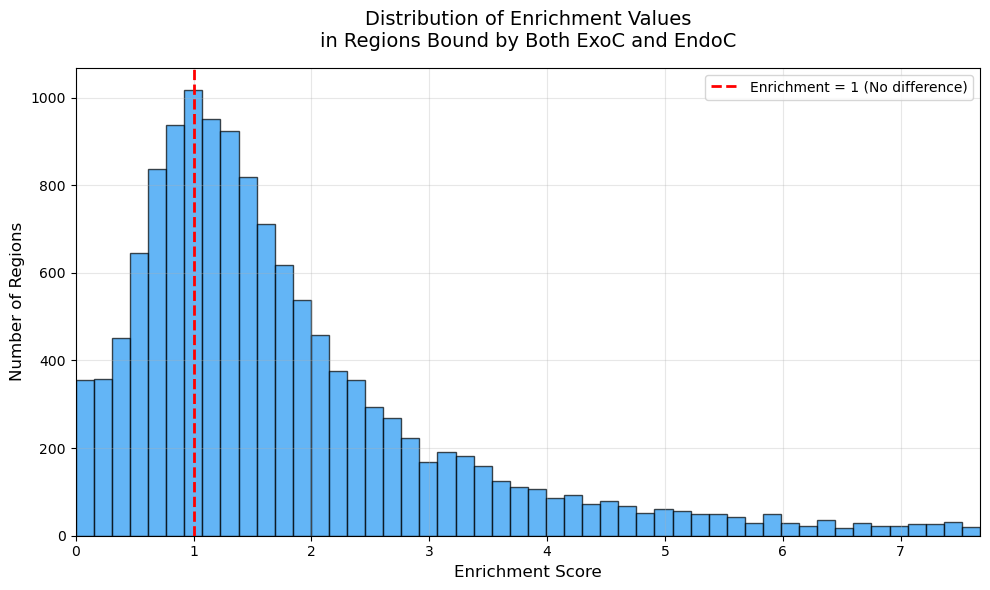

In [7]:
# Create histogram of enrichment values for regions bound by both
plt.figure(figsize=(10, 6))

# Plot histogram with better binning and transparency
# Calculate reasonable range based on data distribution
q1, q3 = both_df['enrichment'].quantile([0.25, 0.75])
factor = 3
iqr = q3 - q1
range_min = max(0, q1 - factor * iqr)  # Don't go below 0 for enrichment
range_max = q3 + factor * iqr

# Plot histogram and get the axis object
n, bins, patches = plt.hist(both_df['enrichment'], bins=50, edgecolor='black', alpha=0.7,
                          color='#2196F3', density=False, range=(range_min, range_max))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Improve axis labels and title
plt.xlabel('Enrichment Score', fontsize=12)
plt.ylabel('Number of Regions', fontsize=12)
plt.title('Distribution of Enrichment Values\nin Regions Bound by Both ExoC and EndoC',
          fontsize=14, pad=15)

# Add vertical line at enrichment = 1
plt.axvline(x=1, color='red', linestyle='--', linewidth=2,
            label='Enrichment = 1 (No difference)')

# Set x-axis limits based on the actual data range
plt.xlim(range_min, range_max)

# Add legend with better positioning
plt.legend(loc='upper right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()


Summary statistics of enrichment values:
count    14183.000000
mean         5.750296
std         81.881526
min          0.000503
25%          0.914573
50%          1.498065
75%          2.604506
max       7465.045248
Name: enrichment, dtype: float64

Number of outliers (enrichment > 7.674304469381023): 938

Top 10 outliers by enrichment value:
         chr      start        end  cpg_length   enrichment
7303    chr2   26138465   26138848         383  7465.045248
10840   chr5  137645108  137645485         377  3617.883227
11796   chr7   16313668   16314092         424  2656.748996
9891    chr4  148068299  148068522         223  1824.015845
4793   chr15   82963242   82963451         209  1410.532705
7373    chr2   30062876   30063155         279  1271.057558
11854   chr7   19342089   19342393         304  1228.994003
14539   chrX   12140168   12140599         431  1181.722479
12896   chr8   14095589   14097363        1774  1178.816020
5997   chr17   47975244   47975582         338  1098.4

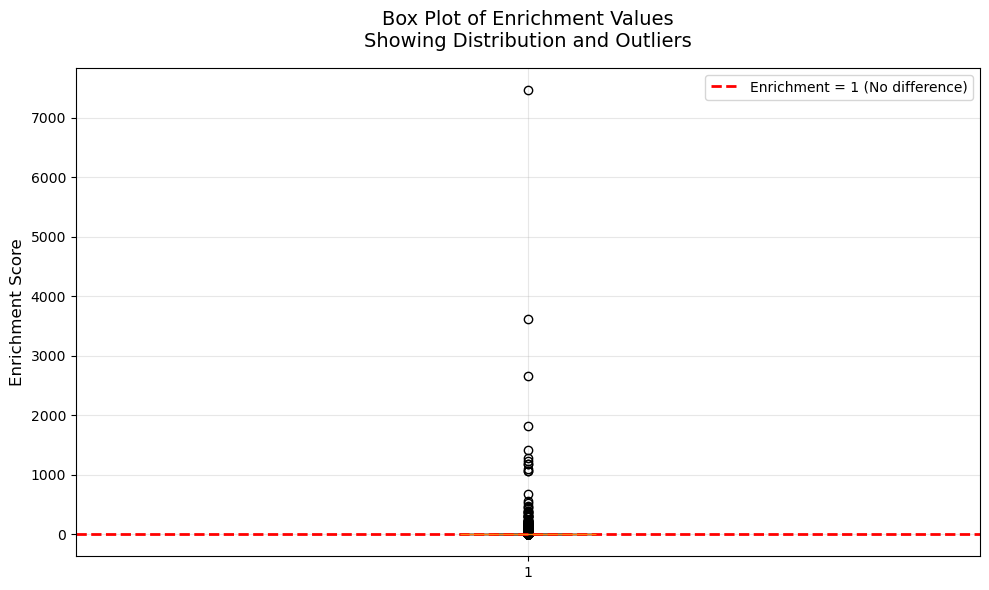

In [8]:
# Print summary statistics of enrichment values
print("Summary statistics of enrichment values:")
print(both_df['enrichment'].describe())

# Find outliers (values > range_max)
outliers_df = both_df[both_df['enrichment'] > range_max].copy()
outliers_df = outliers_df.sort_values('enrichment', ascending=False)

print(f"\nNumber of outliers (enrichment > {range_max}):", len(outliers_df))
print("\nTop 10 outliers by enrichment value:")
print(outliers_df[['chr', 'start', 'end', 'cpg_length', 'enrichment']].head(10))

# Create box plot to visualize distribution and outliers
plt.figure(figsize=(10, 6))
# The whis parameter controls the whisker length in the boxplot
# whis=factor means whiskers extend to points within factor * IQR of Q1/Q3
# Points beyond the whiskers are considered outliers and plotted individually
plt.boxplot(both_df['enrichment'], whis=factor)
plt.ylabel('Enrichment Score', fontsize=12)
plt.title('Box Plot of Enrichment Values\nShowing Distribution and Outliers',
          fontsize=14, pad=15)
plt.grid(True, alpha=0.3)

# Add horizontal line at enrichment = 1
plt.axhline(y=1, color='red', linestyle='--', linewidth=2,
            label='Enrichment = 1 (No difference)')

plt.legend()
plt.tight_layout()
plt.show()


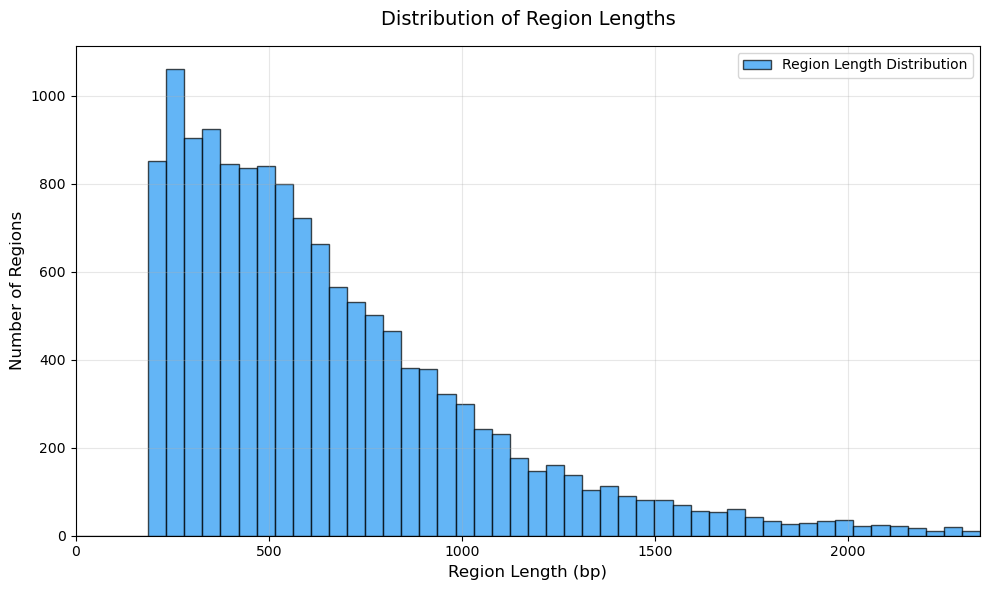

In [9]:
# Create histogram of cpg_length values for regions bound by both
plt.figure(figsize=(10, 6))

# Plot histogram with better binning and transparency
# Calculate reasonable range based on data distribution
q1, q3 = both_df['cpg_length'].quantile([0.25, 0.75])
factor = 3
iqr = q3 - q1
range_min = max(0, q1 - factor * iqr)  # Don't go below 0 for cpg_length
range_max = q3 + factor * iqr

# Plot histogram and get the axis object
n, bins, patches = plt.hist(both_df['cpg_length'], bins=50, edgecolor='black', alpha=0.7,
                          color='#2196F3', density=False, range=(range_min, range_max),
                          label='Region Length Distribution')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Improve axis labels and title
plt.xlabel('Region Length (bp)', fontsize=12)
plt.ylabel('Number of Regions', fontsize=12)
plt.title('Distribution of Region Lengths',
          fontsize=14, pad=15)

# Set x-axis limits based on the actual data range
plt.xlim(range_min, range_max)

# Add legend with better positioning
plt.legend(loc='upper right')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()


In [10]:
exo_only_df

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
1,chr1,3670619,3671074,455,613,CpG:,29.962999,0.0,inf,1.0,exo_only,False,3,0,3,3,"47.333859716142925,42.31702634371244,0.23810998528868288","0.0,0.0,0.0",0,0,6.06037,NaN,3670619,3671074,455,21.118221,0.0,0.704810,0.0,1,0
13,chr1,6359082,6359442,360,633,CpG:,20.435028,0.0,inf,1.0,exo_only,False,2,0,3,3,"43.57137777540419,0.0,17.73370516035292","0.0,0.0,0.0",1,0,2.38625;9.47173,NaN,6359082,6359442,360,17.890204,0.0,0.875468,0.0,2,0
38,chr1,14755151,14755803,652,697,CpG:,13.857874,0.0,inf,1.0,exo_only,False,2,0,3,3,"4.745636489493715,0.0,36.827984414583334","0.0,0.0,0.0",1,0,4.14992;8.80177,NaN,14755151,14755803,652,16.357460,0.0,1.180373,0.0,2,0
48,chr1,17091517,17091971,454,715,CpG:,20.137771,0.0,inf,1.0,exo_only,False,2,0,3,3,"34.59418138008286,0.0,25.819131307139795","0.0,0.0,0.0",1,0,5.67863;7.84621,NaN,17091517,17091971,454,14.683273,0.0,0.729141,0.0,2,0
50,chr1,17145467,17145795,328,715,CpG:,37.652118,0.0,inf,1.0,exo_only,False,3,0,3,3,"64.65222805302318,13.420655669235602,34.8834710004853","0.0,0.0,0.0",0,0,7.61708;3.42752,NaN,17145467,17145795,328,21.006627,0.0,0.557914,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14802,chrX,136215031,136215549,518,1624,CpG:,0.647740,0.0,inf,1.0,exo_only,False,1,0,3,3,"0.0,1.943218978675636,0.0","0.0,0.0,0.0",0,0,2.44856,NaN,136215031,136215549,518,0.916042,0.0,1.414214,0.0,1,0
14851,chrX,155622659,155623834,1175,1772,CpG:,1.589033,0.0,inf,1.0,exo_only,False,3,0,3,3,"0.22503600780000077,0.3996132708610372,4.142450824494057","0.0,0.0,0.0",1,0,7.39974,5.09069,155622659,155623834,1175,1.806945,0.0,1.137135,0.0,1,1
14852,chrX,155624648,155624961,313,1772,CpG:,25.559002,0.0,inf,1.0,exo_only,False,3,0,3,3,"4.342484640237242,24.002289939612247,48.332231976353704","0.0,0.0,0.0",1,0,7.39974;4.54527,NaN,155624648,155624961,313,17.992443,0.0,0.703957,0.0,2,0
14869,chrX,161908242,161909235,993,1820,CpG:,7.694658,0.0,inf,1.0,exo_only,False,2,0,3,3,"5.839501579722609,17.24447172333947,0.0","0.0,0.0,0.0",0,0,2.87251,NaN,161908242,161909235,993,7.161199,0.0,0.930672,0.0,1,0


In [11]:
endo_only_df

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
0,chr1,3531624,3531843,219,611,CpG:,0.0,3.272987,0.0,1.0,endo_only,False,0,2,3,3,"0.0,0.0,0.0","0.0,7.742945475121067,2.076016413022394",0,0,NaN,5.10095,3531624,3531843,219,0.0,3.272395,0.0,0.999819,0,1
117,chr1,37875331,37875824,493,873,CpG:,0.0,19.818894,0.0,1.0,endo_only,False,0,2,3,3,"0.0,0.0,0.0","46.51646766894729,0.0,12.940215507337093",0,1,NaN,3.25313;5.92257,37875331,37875824,493,0.0,19.603275,0.0,0.989121,0,2
122,chr1,38210065,38210345,280,876,CpG:,0.0,15.121311,0.0,1.0,endo_only,False,0,1,3,3,"0.0,0.0,0.0","45.36393329075405,0.0,0.0",0,0,4.17751,4.77281,38210065,38210345,280,0.0,21.384763,0.0,1.414214,1,1
221,chr1,63365284,63365489,205,1068,CpG:,0.0,23.110927,0.0,1.0,endo_only,False,0,1,3,3,"0.0,0.0,0.0","0.0,0.0,69.33278183355564",0,1,NaN,5.34011,63365284,63365489,205,0.0,32.683787,0.0,1.414214,0,1
296,chr1,75384918,75385180,262,1160,CpG:,0.0,28.415520,0.0,1.0,endo_only,False,0,3,3,3,"0.0,0.0,0.0","2.199217563367072,21.07215997826962,61.97518326853978",0,0,NaN,6.09424,75384918,75385180,262,0.0,24.949752,0.0,0.878033,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14697,chrX,93294624,93294867,243,1296,CpG:,0.0,0.773353,0.0,1.0,endo_only,False,0,1,3,3,"0.0,0.0,0.0","0.0,2.3200584919854936,0.0",0,1,NaN,5.31963,93294624,93294867,243,0.0,1.093686,0.0,1.414214,0,1
14746,chrX,102178466,102178786,320,1364,CpG:,0.0,4.198755,0.0,1.0,endo_only,False,0,1,3,3,"0.0,0.0,0.0","12.596265387535095,0.0,0.0",0,0,NaN,3.96498,102178466,102178786,320,0.0,5.937936,0.0,1.414214,0,1
14809,chrX,139610568,139611192,624,1650,CpG:,0.0,5.103572,0.0,1.0,endo_only,False,0,2,3,3,"0.0,0.0,0.0","15.10254334180783,0.0,0.2081727561278221",0,0,NaN,2.60263,139610568,139611192,624,0.0,7.070851,0.0,1.385471,0,1
14837,chrX,152144159,152145127,968,1745,CpG:,0.0,0.080472,0.0,1.0,endo_only,False,0,1,3,3,"0.0,0.0,0.0","0.0,0.24141487011239549,0.0",0,0,7.15537,NaN,152144159,152145127,968,0.0,0.113804,0.0,1.414214,1,0
